# Assignment2 - Supervised Learning flow

# Part 1 - Student details:
* Please write the First Name and last 4 digits of the i.d. for each student. For example:
<pre>Israel 9812</pre>

In [ ]:
# student 1: Guy 7265
# student 2:

## Part 2 - Initial Preparations 
You could add as many code cells as needed

Train Set:
   alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    12.08        1.83  2.32               18.5       81.0           1.60   
1    13.58        2.58  2.69               24.5      105.0           1.55   
2    12.37        0.94  1.36               10.6       88.0           1.98   
3    11.82        1.72  1.88               19.5       86.0           2.50   
4    13.16        3.57  2.15               21.0      102.0           1.50   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        1.50                  0.52             1.64             2.40  1.08   
1        0.84                  0.39             1.54             8.66  0.74   
2        0.57                  0.28             0.42             1.95  1.05   
3        1.64                  0.37             1.42             2.06  0.94   
4        0.55                  0.43             1.30             4.00  0.60   

   od280/od315_of_diluted_wines  proline  target  


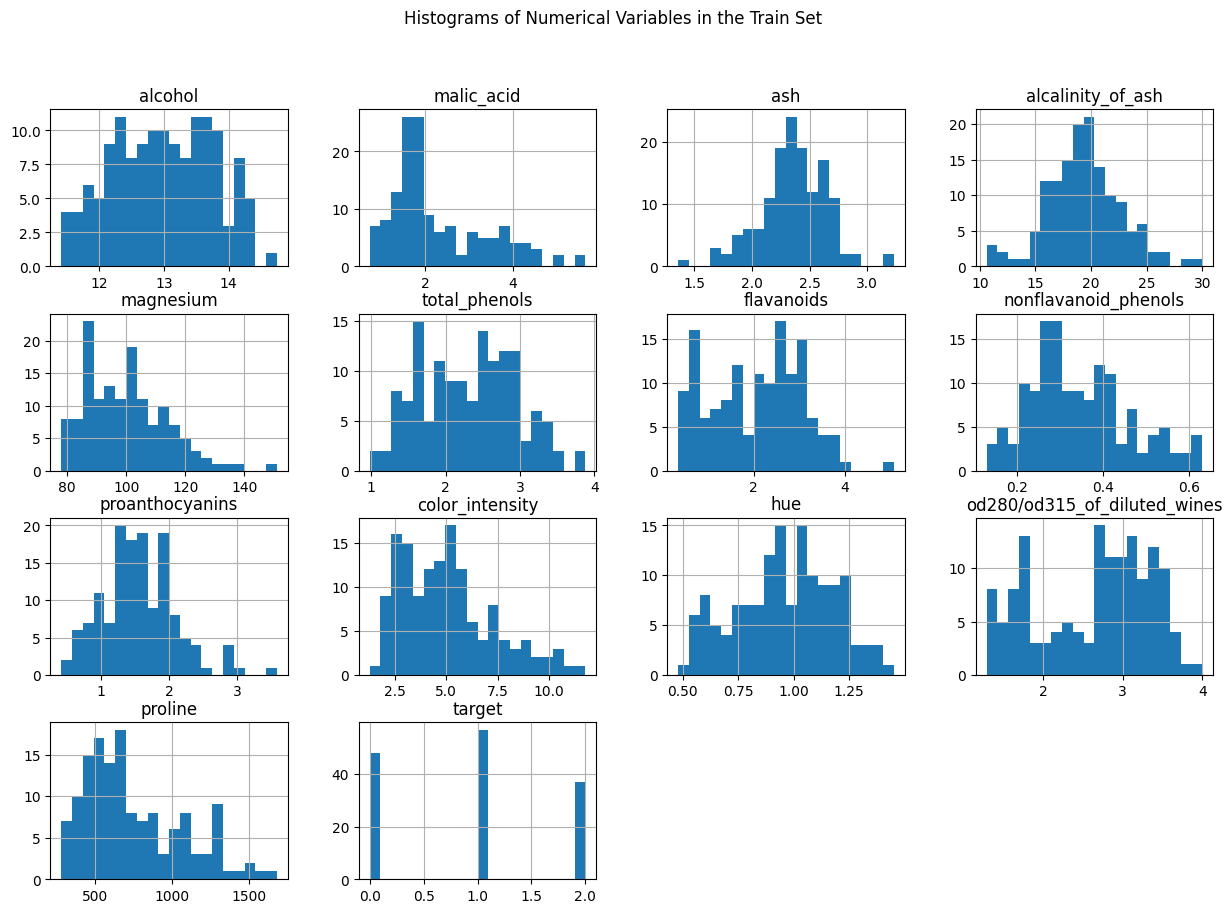

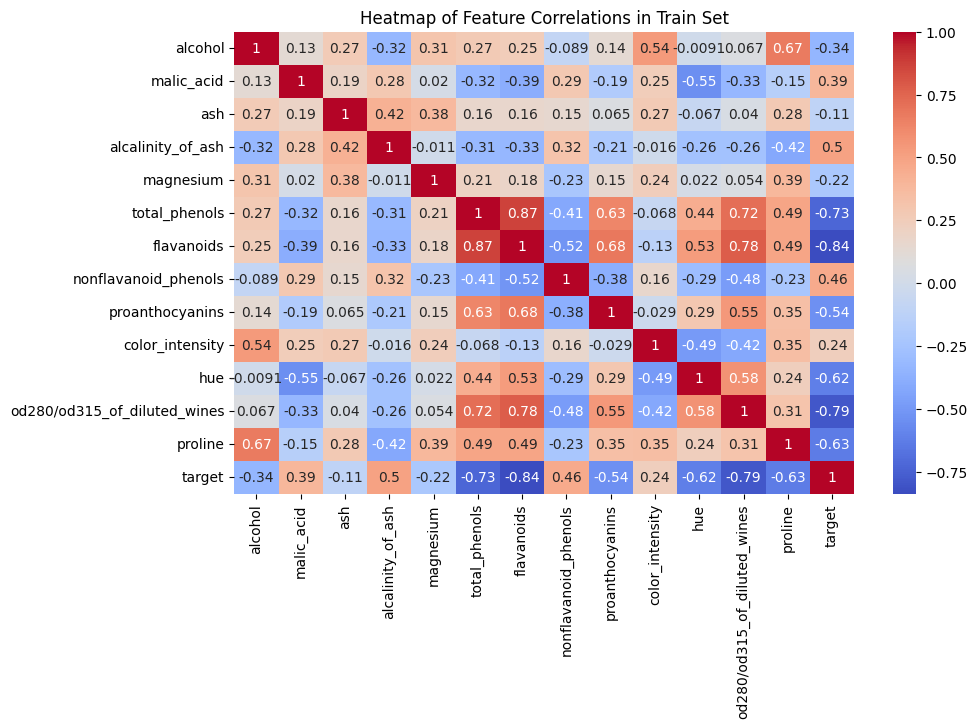

In [2]:
# Part 2 - Initial Preparations

# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

# Loading the datasets
train_df = pd.read_csv('wine_train.csv')
test_df = pd.read_csv('wine_test.csv')

# Displaying the first 5 rows of the train and test sets
print("Train Set:")
print(train_df.head())
print("\nTest Set:")
print(test_df.head())

# Exploratory Data Analysis (EDA)
# Displaying basic statistics
print("\nTrain Set Statistics:")
print(train_df.describe())

print("\nTest Set Statistics:")
print(test_df.describe())

# Visualization: Histograms of numerical variables
train_df.hist(bins=20, figsize=(15, 10))
plt.suptitle('Histograms of Numerical Variables in the Train Set')
plt.show()

# Visualization: Heatmap of correlations between variables
plt.figure(figsize=(10, 6))
sns.heatmap(train_df.corr(), annot=True, cmap='coolwarm')
plt.title('Heatmap of Feature Correlations in Train Set')
plt.show()


## Part 3 - Experiments
You could add as many code cells as needed

In [3]:
# Part 3 - Experiments

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

# Data Preprocessing: Standardizing the data
scaler = StandardScaler()
X_train = train_df.drop('target', axis=1)
y_train = train_df['target']
X_train_scaled = scaler.fit_transform(X_train)

# Experiment with Random Forest Model
rf_model = RandomForestClassifier()
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

# Perform Grid Search with Cross-Validation for Random Forest
grid_search_rf = GridSearchCV(rf_model, param_grid_rf, cv=5, scoring='accuracy')
grid_search_rf.fit(X_train_scaled, y_train)

# Display Best Parameters for Random Forest
print("Best Parameters for Random Forest from Grid Search:")
print(grid_search_rf.best_params_)

# Additional Experiment with Logistic Regression Model
logreg_model = LogisticRegression(max_iter=1000)
param_grid_logreg = {
    'C': [0.1, 1, 10],
    'penalty': ['l2']
}

# Perform Grid Search with Cross-Validation for Logistic Regression
grid_search_logreg = GridSearchCV(logreg_model, param_grid_logreg, cv=5, scoring='accuracy')
grid_search_logreg.fit(X_train_scaled, y_train)

# Display Best Parameters for Logistic Regression
print("Best Parameters for Logistic Regression from Grid Search:")
print(grid_search_logreg.best_params_)


Best Parameters for Random Forest from Grid Search:
{'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}
Best Parameters for Logistic Regression from Grid Search:
{'C': 0.1, 'penalty': 'l2'}


## Part 4 - Training 
Use the best combination of feature engineering, model (algorithm and hyperparameters) from the experiment part (part 3)

In [4]:
# Part 4 - Training

# Using the best estimator from Grid Search for final training
best_rf_model = grid_search_rf.best_estimator_
best_rf_model.fit(X_train_scaled, y_train)

# Additionally training the best logistic regression model
best_logreg_model = grid_search_logreg.best_estimator_
best_logreg_model.fit(X_train_scaled, y_train)


LogisticRegression(C=0.1, max_iter=1000)

## Part 5 - Apply on test and show model performance estimation


Random Forest Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00        11

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



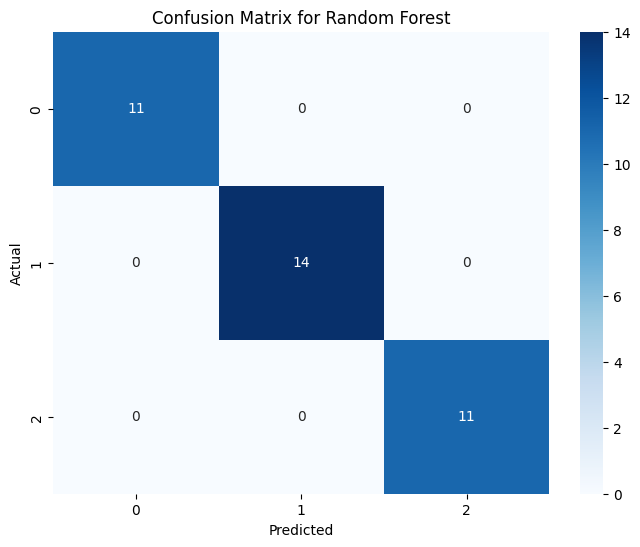


Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00        11

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



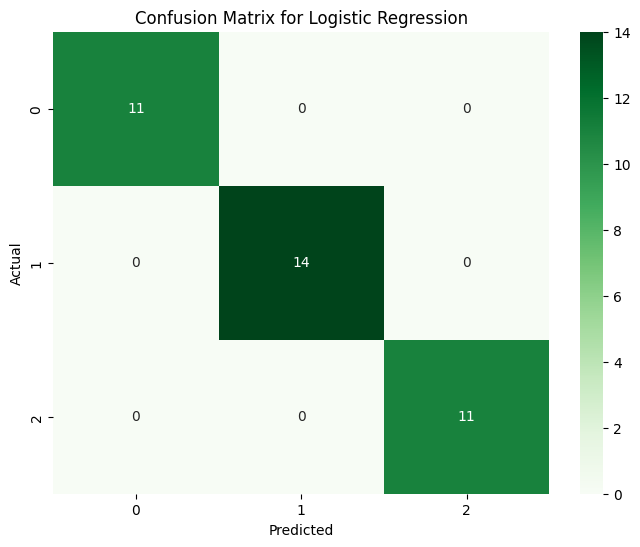

First 5 Predictions on Test Set (Random Forest):
[2 0 2 1 2]
First 5 Predictions on Test Set (Logistic Regression):
[2 0 2 1 2]


In [5]:
# Part 5 - Apply on test and show model performance estimation

from sklearn.metrics import classification_report, confusion_matrix

# Preprocess test data
X_test = test_df.drop('target', axis=1)
y_test = test_df['target']
X_test_scaled = scaler.transform(X_test)

# Predict on Test Set using the Random Forest Model
y_pred_rf = best_rf_model.predict(X_test_scaled)

# Evaluation for Random Forest Model
print("\nRandom Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))

# Confusion Matrix for Random Forest
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt="d", cmap='Blues')
plt.title('Confusion Matrix for Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Predict on Test Set using the Logistic Regression Model
y_pred_logreg = best_logreg_model.predict(X_test_scaled)

# Evaluation for Logistic Regression Model
print("\nLogistic Regression Classification Report:")
print(classification_report(y_test, y_pred_logreg))

# Confusion Matrix for Logistic Regression
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_logreg), annot=True, fmt="d", cmap='Greens')
plt.title('Confusion Matrix for Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Display the first 5 predictions on the test set using both models
print("First 5 Predictions on Test Set (Random Forest):")
print(y_pred_rf[:5])

print("First 5 Predictions on Test Set (Logistic Regression):")
print(y_pred_logreg[:5])
